### Importing required modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

### Loading dataset

In [31]:
df = pd.read_csv(r"C:\Users\Ankit\Desktop\Data Science Content\DataSets\terror.csv", encoding  = 'latin1')

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Studying the Dataset

In [4]:
print("Missing Values :",(df.isna().sum()).sum())

Missing Values : 13853997


In [5]:
print("Total Cells :",df.size)

Total Cells : 24528285


In [6]:
print("Missing Values Percetage :",(((df.isna().sum() ).sum())/(df.size))*100)

Missing Values Percetage : 56.481718962414206


In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 146.9+ MB


***More than half of our dataset is either empty or having NULL values.***

# Cleaning

**Renaming some column names** 

In [9]:
df = df.rename (columns = {"eventid":"Event_ID", "iyear":"Year", "imonth":"Month", "iday":"Day", "country_txt":"Country", 
                           "region_txt":"Region", "provstate":"State",
                           "success":"Success", "suicide":"Suicide", "attacktype1_txt":"Attack_type", 
                           "targtype1_txt":"Target_type", "natlty1_txt":"Nationality", "gname":"Group_name", 
                           "weaptype1_txt":"Weapon_type", "nkill":"Killed", "nwound":"Wounded", 
                           "dbsource":"Database_source"
                          })
df.head()

,Event_ID,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,Database_source,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**Updating dataframe with required columns only**

In [10]:
df = df[["Event_ID", "Year", "Month", "Day", "Country", "Region", "State", "Success", "Suicide",
         "Attack_type", "Target_type", "Weapon_type", "Killed", "Wounded", "Nationality", "Group_name",
         "Database_source"]]
df.head()

,Event_ID,Year,Month,Day,Country,Region,State,Success,Suicide,Attack_type,Target_type,Weapon_type,Killed,Wounded,Nationality,Group_name,Database_source
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,1,0,Assassination,Private Citizens & Property,Unknown,1.0,0.0,Dominican Republic,MANO-D,PGIS
1,197000000002,1970,0,0,Mexico,North America,Federal,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,Belgium,23rd of September Communist League,PGIS
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,1,0,Assassination,Journalists & Media,Unknown,1.0,0.0,United States,Unknown,PGIS
3,197001000002,1970,1,0,Greece,Western Europe,Attica,1,0,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,United States,Unknown,PGIS
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,United States,Unknown,PGIS


In [11]:
df.isnull().sum() 

Event_ID               0
Year                   0
Month                  0
Day                    0
Country                0
Region                 0
State                421
Success                0
Suicide                0
Attack_type            0
Target_type            0
Weapon_type            0
Killed             10313
Wounded            16311
Nationality         1559
Group_name             0
Database_source        0
dtype: int64

In [12]:
df["Killed"] = df.Killed.fillna(0).astype(int)
df["Wounded"] = df.Wounded.fillna(0).astype(int) 

In [13]:
df.dropna(subset = ["State"] ,inplace = True)

In [14]:
df.dropna(subset = ["Nationality"] ,inplace = True)

In [15]:
df.isnull().sum()

Event_ID           0
Year               0
Month              0
Day                0
Country            0
Region             0
State              0
Success            0
Suicide            0
Attack_type        0
Target_type        0
Weapon_type        0
Killed             0
Wounded            0
Nationality        0
Group_name         0
Database_source    0
dtype: int64

**Now our dataset is cleaned, as there are no missing values present**

# Analysis

###  Successful vs Unsuccessful Terrorist Attacks

In [16]:
success = len(df[df["Success"] ==1 ])
failed = len(df[df["Success"] ==0 ])
l = [success, failed]

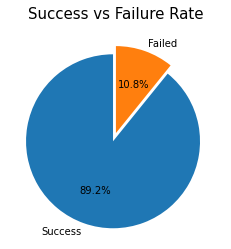

In [17]:
plt.pie(l, labels = ["Success", "Failed"], autopct = "%.1f%%", startangle = 90, explode = [0.1,0])
plt.title("Success vs Failure Rate", fontsize = 15)
plt.show()

**Almost 90% of all the terrorist attacks were successful**

### People Killed/Wounded Yearly during the Attacks

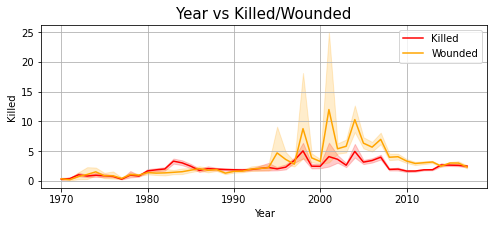

In [18]:
fig, ax = plt.subplots(figsize=(8,3))
sns.lineplot(x = df.Year, y = df.Killed, color = "red", label = "Killed", ax=ax)
sns.lineplot(x = df.Year, y = df.Wounded, color = "orange", label = "Wounded", ax=ax)
plt.title("Year vs Killed/Wounded", fontsize = 15)
plt.grid()
plt.show()

**Gradually, number of people killed/wounded during the terror attacks has been increased.**

### Analysing Countries and States Impacted by Terrorism

In [19]:
# Querying top 10 countries with terror attacks (df1)
gp = df.groupby("Country").sum()
df1 = pd.DataFrame(gp)
df1.sort_values(by = ["Success"],inplace = True, ascending = False)

# Querying top 10 states with terror attacks (df2)
gp_state = df.groupby("State").sum() 
df2 = pd.DataFrame(gp_state)
df2.sort_values(by = ["Success"],inplace = True, ascending = False)

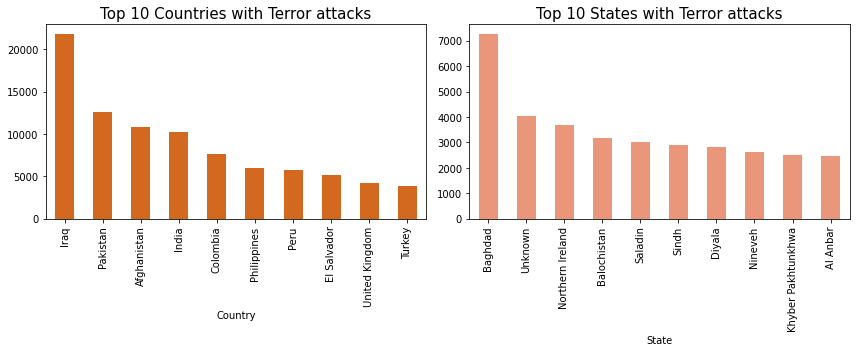

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))

df1.Success.head(10).plot.bar(color = "chocolate", ax = ax1)
ax1.set_title("Top 10 Countries with Terror attacks", fontsize = 15)

df2.Success.head(10).plot.bar(color = "darksalmon", ax = ax2)
ax2.set_title("Top 10 States with Terror attacks", fontsize = 15)

plt.tight_layout()
plt.show()

**Iraq has been encountered with the max number of Terrorist attacks followed by Pakistan and Afghanistan, hence need to be taken into account.**

**Baghdad is most hit by terror attacks among all other states followed by Northern Ireland and Balochistan. These states should be strictly monitored in terms of security.**

### Analysing Nationalities Affected During the Attacks

In [21]:
gp_nat = df.groupby("Nationality").sum()
df3 = pd.DataFrame(gp_nat)
df3.sort_values(by = ["Success"],inplace = True, ascending = False)

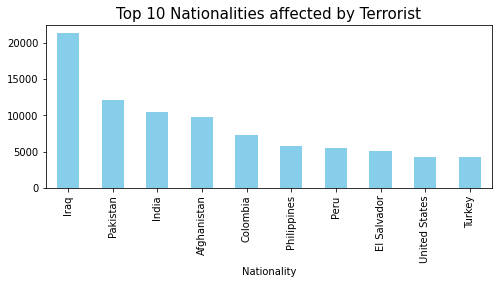

In [22]:
fig, ax = plt.subplots(figsize=(8,3))

df3.Success.head(10).plot.bar(color = "skyblue")

plt.title("Top 10 Nationalities affected by Terrorist", fontsize = 15)
plt.show()

**Iraq is the most affected Nationality among all others**

### Analysing Regions Affected Yearly

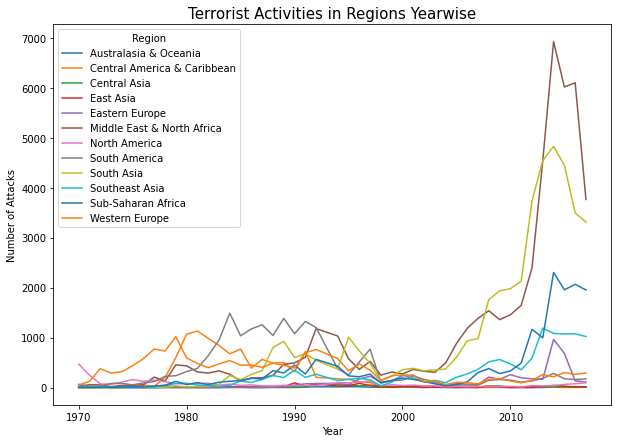

In [23]:
fig, ax = plt.subplots(figsize = (10,7))

pd.crosstab(df.Year, df.Region).plot( ax = ax)

plt.title('Terrorist Activities in Regions Yearwise', fontsize = 15)
plt.ylabel('Number of Attacks')

plt.show()

**Huge increase in terrorism can be noticed in Middle-East & North-African regions during the years.**

**South-Asian region also got highly impacted**

### Analysing Terrorist-Groups Responsible for the Attacks

In [24]:
gp_groupn = df.groupby("Group_name").sum()
df4 = pd.DataFrame(gp_groupn)
df4.sort_values(by = ["Success"],inplace = True, ascending = False)

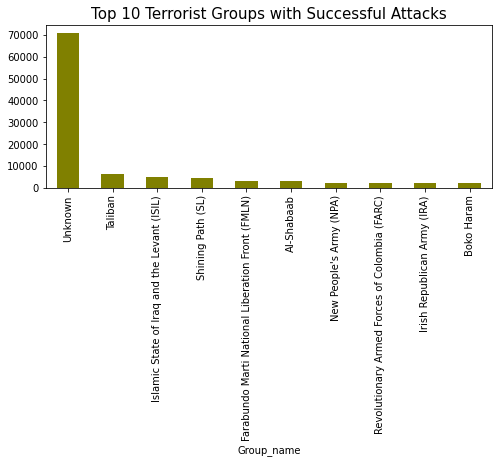

In [25]:
fig, ax = plt.subplots(figsize=(8,3))

df4.Success.head(10).plot.bar(color = "olive")

plt.title("Top 10 Terrorist Groups with Successful Attacks", fontsize = 15)
plt.show()

**Most of the groups are unknown who were involved in terrorist attacks. Taliban and ISIL were involved in most of the terrorist attacks.**

### Analysing Attack and Weapon Types

In [26]:
l_at = list(df.Attack_type.unique())
l_at.sort()

l_wt = list(df.Weapon_type.unique())
l_wt.sort()

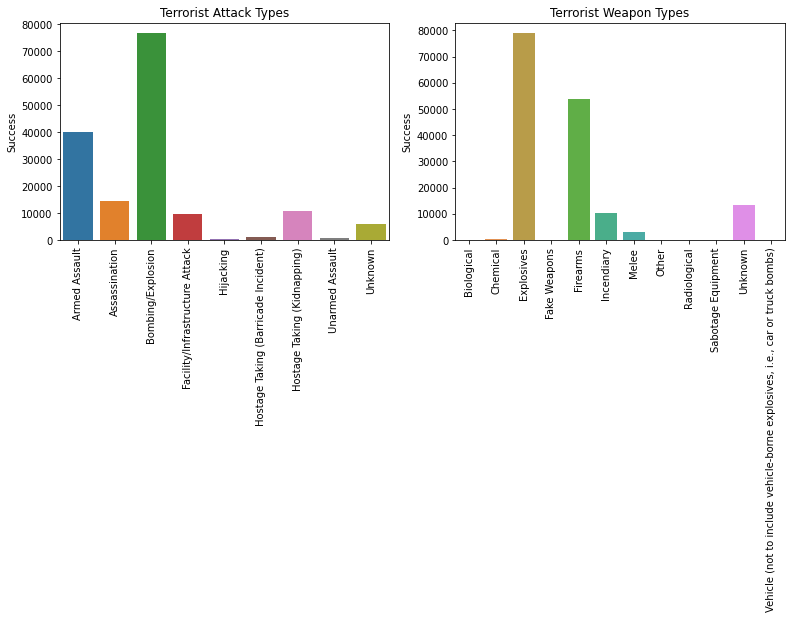

In [27]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize = (13,4))
gp_1 = df.groupby("Attack_type").sum()
gp_2 = df.groupby("Weapon_type").sum() 

a1 = sns.barplot(x = l_at, y = gp_1.Success, ax = ax1)
a2 = sns.barplot(x = l_wt, y = gp_2.Success, ax = ax2)

a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
a2.set_xticklabels(a2.get_xticklabels(), rotation=90)

a1.set(title= "Terrorist Attack Types")
a2.set(title= "Terrorist Weapon Types")

plt.tight_layout()
plt.show()

**1. Bombing/Explosion is the most used attack type during the terror attack.**

**2. Explosive is the most used weapon followed by Firearms by the terrorists.**

### Analysing Database-Sources used for Ransom-Attacks

In [28]:
l_dbs = df.Database_source.unique()

gp_dbs = df.groupby("Database_source").sum()

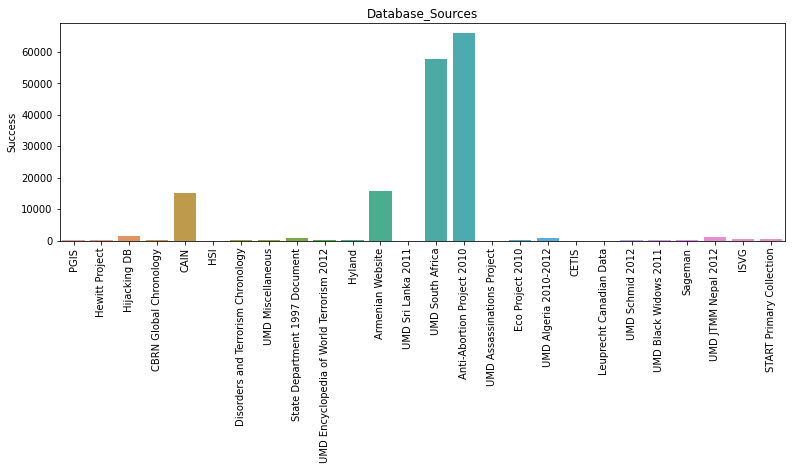

In [29]:
fig, (ax1)= plt.subplots(figsize = (13,4))

f = sns.barplot(x = l_dbs, y = gp_dbs.Success)
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.set(title= "Database_Sources")

plt.show()

**"Anti-Abortion Project 2010" is the most used database source  followed by "UMD South-Africa" for Ransom-Attacks by terrorists** 

### Analysing Target Types during the Terrorist Attacks

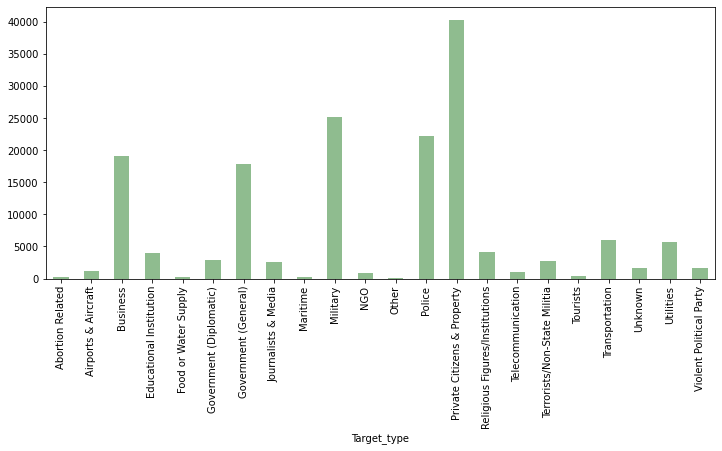

In [30]:
fig, ax = plt.subplots(figsize = (12,5))
df.groupby("Target_type").sum().Success.plot(kind = "bar", color = "darkseagreen")
plt.show()

**"Private citizens & Property" has been the major target_type by terrorists during the attacks.**

**"Military", "Police", "Business" and "Government(General)" were also been targeted many number of times, hence strong security measures should be taken.**